In [1]:
# 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# 데이터 로드
file_path = "/content/drive/My Drive/Colab Notebooks/backpack_prediction_challenge/playground-series-s5e2/train.csv"
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

Mounted at /content/drive


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [2]:
# 1. 전반적인 데이터 정보 확인하기
print(f'<<데이터 크기>> : {df.shape}')
print('-'*80)
print('<<데이터 정보>>') # columns와 data type
print(df.info())
print('-'*80)
print('<<결측값 개수>>') # 결측값이 어느정도있는지 빠르게 파악
print(df.isnull().sum())

<<데이터 크기>> : (300000, 11)
--------------------------------------------------------------------------------
<<데이터 정보>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB
None
---------------------------

In [3]:
# 2. 데이터 정리하기

# 2.1. 데이터 id 제외하기
df = df.drop('id', axis=1)

# 2.2.범주형 변수와 수치형 변수를 구분
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
  # df.columns[(df.dtypes=='object') | (df.dtypes=='category')].tolist()
  # df.columns[df.dtypes.isin(['int64', 'float64']).tolist()

print('<<범주형 변수>>')
print(categorical_cols)
print('<<수치형 변수>>')
print(numeric_cols)
print('-'*80)

# 2.3. 명목형(nominal), 서열형(ordinal), 구간형(interval), 비율형(rational) 나누기
ordinal_cols = ['Size']
nominal_cols = [x for x in categorical_cols if x not in ordinal_cols] # list(filter(lambda x: x != ordinal_cols, categorical_cols))
interval_cols = []
rational_cols = [x for x in numeric_cols if x not in interval_cols]

print('<<명목형 변수>>')
print(nominal_cols)
print('<<서열형 변수>>')
print(ordinal_cols)
print('<<구간형 변수>>')
print(interval_cols)
print('<<비율형 변수>>')
print(rational_cols)

<<범주형 변수>>
['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
<<수치형 변수>>
['Compartments', 'Weight Capacity (kg)', 'Price']
--------------------------------------------------------------------------------
<<명목형 변수>>
['Brand', 'Material', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
<<서열형 변수>>
['Size']
<<구간형 변수>>
[]
<<비율형 변수>>
['Compartments', 'Weight Capacity (kg)', 'Price']


In [4]:
# 2.3.1. 범주형 변수 유니크값 구하기

# unique_values = df.apply(lambda col: col.unique())

print('<<명목형 변수 유니크값>>')
print( {col: df[col].unique() for col in nominal_cols} )
print()
print(df[nominal_cols].nunique())
print('-'*80)
print('<<서열형 변수 유니크값>>')
print( {col: df[col].unique() for col in ordinal_cols} )
print()
print(df[ordinal_cols].nunique())
print('-'*80)

<<명목형 변수 유니크값>>
{'Brand': array(['Jansport', 'Under Armour', 'Nike', 'Adidas', 'Puma', nan],
      dtype=object), 'Material': array(['Leather', 'Canvas', 'Nylon', nan, 'Polyester'], dtype=object), 'Laptop Compartment': array(['Yes', 'No', nan], dtype=object), 'Waterproof': array(['No', 'Yes', nan], dtype=object), 'Style': array(['Tote', 'Messenger', nan, 'Backpack'], dtype=object), 'Color': array(['Black', 'Green', 'Red', 'Blue', 'Gray', 'Pink', nan], dtype=object)}

Brand                 5
Material              4
Laptop Compartment    2
Waterproof            2
Style                 3
Color                 6
dtype: int64
--------------------------------------------------------------------------------
<<서열형 변수 유니크값>>
{'Size': array(['Medium', 'Small', 'Large', nan], dtype=object)}

Size    3
dtype: int64
--------------------------------------------------------------------------------


        Compartments  Weight Capacity (kg)          Price
count  300000.000000         299862.000000  300000.000000
mean        5.443590             18.029994      81.411107
std         2.890766              6.966914      39.039340
min         1.000000              5.000000      15.000000
25%         3.000000             12.097867      47.384620
50%         5.000000             18.068614      80.956120
75%         8.000000             24.002375     115.018160
max        10.000000             30.000000     150.000000


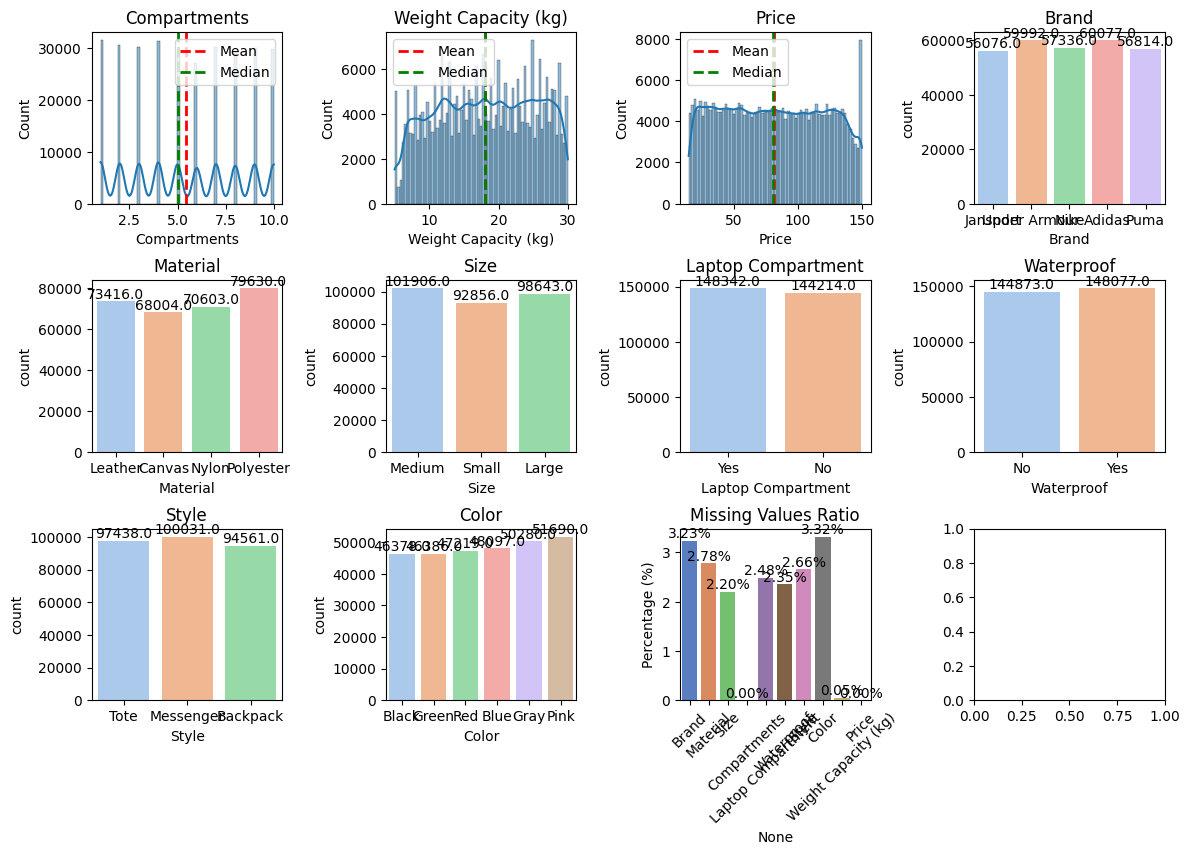

In [11]:
# 3. 결측값

# 3.1. 데이터 분포를 파악하기

# 3.1.1. 수치형 데이터 통계 요약
print(df[numeric_cols].describe())

# 3.2. 히스토그램 시각화
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = len(numeric_cols) + len(categorical_cols)
cols = 4
rows = (num_plots + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(12, 3 * rows))

# 3.2.1. 수치형 변수 시각화
for i, col in enumerate(numeric_cols):
    ax = axes[i // cols, i % cols]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(col)
    ax.legend()

# 3.2.2. 범주형 변수 시각화
for j, col in enumerate(categorical_cols):
    i = len(numeric_cols) + j
    ax = axes[i // cols, i % cols]
    sns.countplot(data=df, x=col, ax=ax, palette='pastel', hue=col, legend=False)
    ax.set_title(col)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# 3.3. 결측치 비율 확인
missing_info = df.isnull().mean() * 100
i = len(numeric_cols) + len(categorical_cols)
ax = axes[i // cols, i % cols]
sns.barplot(x=missing_info.index, y=missing_info.values, hue=missing_info.index, palette='muted', ax=ax, legend=False)
ax.set_title('Missing Values Ratio')
ax.set_ylabel('Percentage (%)')
ax.tick_params(axis='x', rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [ ]:
# 3.4. 결측값 채우기
# CatBoost는 결측치를 자동 인식 및 처리함으로 건들지 않음.

# from sklearn.impute import SimpleImputer

# 3.4.1. 범주형 변수: 최빈값으로 채우기 or 'unknown'으로 처리하기
# 3.4.2. 수치형 변수: 중앙값으로 채우기

In [ ]:
# # 4. 레이블 인코딩 (Label Encoding)
# # ++ 브랜드와 소재는 추후 타깃 인코딩으로 해보기.

# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# # 4.1. 원핫 인코딩 - 명목형 변수
# # df_encoded = pd.get_dummies(df, columns=['...'], drop_first=Ture)
# ohe = OneHotEncoder(drop='first', sparse=False)
# encoded = ohe.fit_transform(df[nominal_cols])
# encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(nominal_cols))
# df = pd.concat([df.drop(nominal_cols, axis=1), encoded_df], axis=1)

# # 4.2. 순서형 인코딩
# size_order = [['Small', 'Medium', 'Large']]
# oe = OrdinalEncoder(categories=size_order, handle_unknown='use_encoded_value', unknown_value=-1)
# encoded = oe.fit_transform(df[ordinal_cols])
# encoded_df = pd.DataFrame(encoded, columns=ordinal_cols)
# df = pd.concat([df.drop(ordinal_cols, axis=1), encoded_df], axis=1)

# # 4.3. 타깃 인코딩

# # 4.4. 빈도 인코딩

[id                      False
 Brand                    True
 Material                 True
 Size                     True
 Compartments            False
 Laptop Compartment       True
 Waterproof               True
 Style                    True
 Color                    True
 Weight Capacity (kg)    False
 Price                   False
 dtype: bool]

# CatBoost 수행

In [16]:
pip install catboost scikit-learn pandas matplotlib shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [33]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모델
from catboost import CatBoostRegressor, Pool

# 데이터 분할 및 평가
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 특성 중요도
import shap

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

In [14]:
# 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# 데이터 로드
file_path = "/content/drive/My Drive/Colab Notebooks/backpack_prediction_challenge/playground-series-s5e2/train.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
df = pd.read_csv(file_path)

In [35]:
# 수치형 결측치: 그대로 둬도 CatBoost가 처리하지만, 성능 개선을 위해 중앙값으로 처리
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 범주형 결측치: 'Missing'으로 대체
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna('Missing')

# 처리 후 확인
print(df.isnull().sum())

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64


In [36]:
# 학습/타깃 데이터 구성
X = df.drop(['Price','id'], axis=1, errors='ignore')
y = df['Price']

# 범주형 컬럼 리스트 추출
cat_features = list(X.select_dtypes(include='object').columns)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pool 객체 생성 (성능 최적화)
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

In [37]:
# CatBoost 회귀 모델 생성
model = CatBoostRegressor(
    iterations=1000,        # 최대 반복 횟수
    learning_rate=0.03,     # 학습률
    depth=6,                # 트리 깊이
    loss_function='RMSE',   # 회귀 문제이므로 RMSE 사용
    cat_features=cat_features,
    random_seed=42,
    verbose=100             # 학습 진행 상황 출력 주기
)

# 모델 학습
model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=100)

0:	learn: 39.0621047	test: 38.9432535	best: 38.9432535 (0)	total: 294ms	remaining: 4m 53s
100:	learn: 39.0227919	test: 38.9143319	best: 38.9143319 (100)	total: 37.3s	remaining: 5m 32s
200:	learn: 39.0112123	test: 38.9118939	best: 38.9118939 (200)	total: 1m 3s	remaining: 4m 10s
300:	learn: 39.0033272	test: 38.9109234	best: 38.9109234 (300)	total: 1m 28s	remaining: 3m 25s
400:	learn: 38.9947103	test: 38.9104182	best: 38.9104049 (395)	total: 1m 55s	remaining: 2m 52s
500:	learn: 38.9810943	test: 38.9081003	best: 38.9077660 (485)	total: 2m 25s	remaining: 2m 24s
600:	learn: 38.9690793	test: 38.9065927	best: 38.9065367 (596)	total: 2m 56s	remaining: 1m 57s
700:	learn: 38.9578237	test: 38.9058454	best: 38.9056650 (679)	total: 3m 29s	remaining: 1m 29s
800:	learn: 38.9463070	test: 38.9052296	best: 38.9051737 (796)	total: 4m 2s	remaining: 1m
900:	learn: 38.9369457	test: 38.9050313	best: 38.9047696 (878)	total: 4m 33s	remaining: 30.1s
999:	learn: 38.9281716	test: 38.9045045	best: 38.9044794 (983)	

In [38]:
# 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f"📊 MAE: {mae:.2f}")
print(f"📊 MSE: {mse:.2f}")
print(f"📊 RMSE: {rmse:.2f}")
print(f"🎯 R2 Score: {r2:.3f}")

📊 MAE: 33.63
📊 MSE: 1513.56
📊 RMSE: 38.90
🎯 R2 Score: 0.002


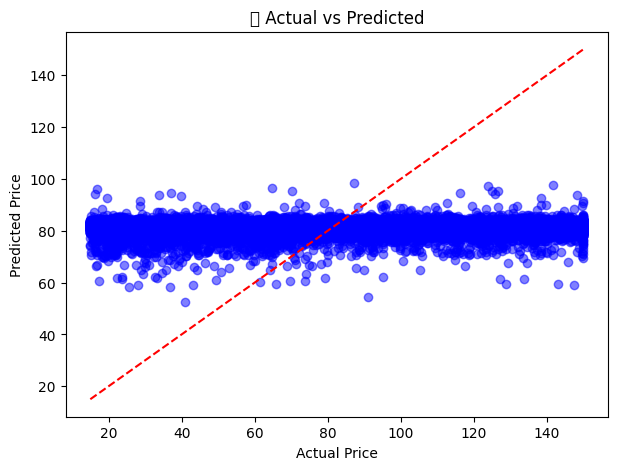

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('🔍 Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

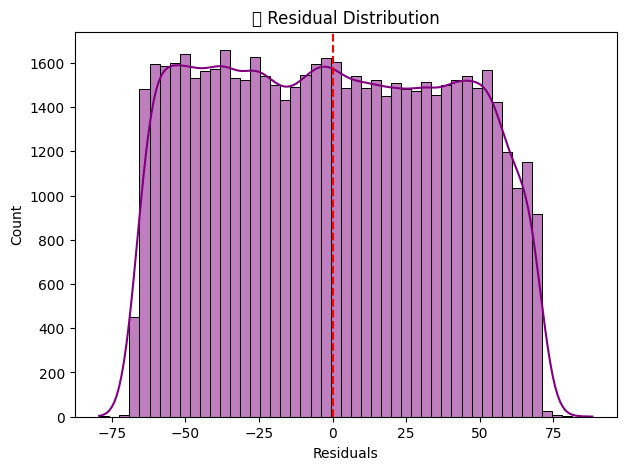

In [42]:
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title('🔍 Residual Distribution')
plt.xlabel('Residuals')
plt.axvline(0, color='red', linestyle='--')
plt.show()

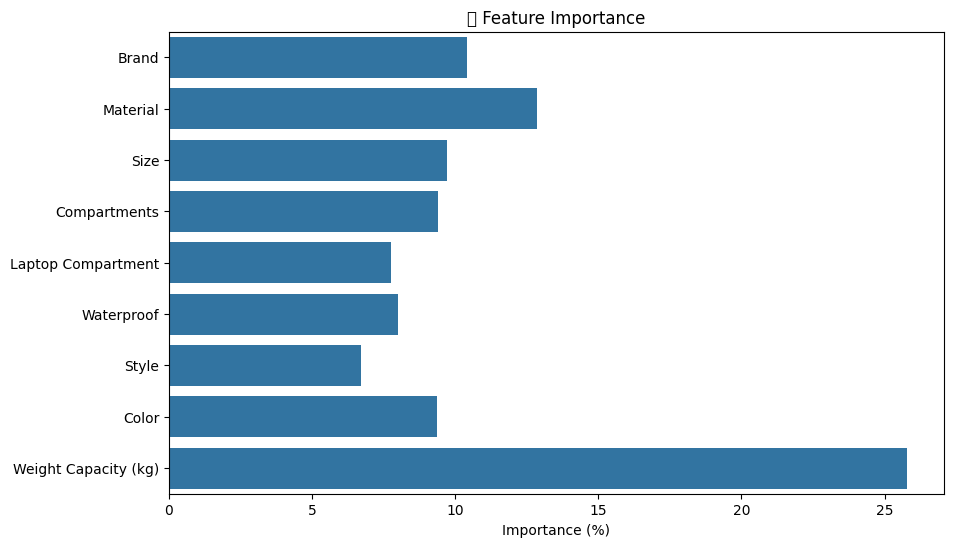

In [39]:
# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("🔍 Feature Importance")
sns.barplot(x=model.feature_importances_, y=model.feature_names_)
plt.xlabel("Importance (%)")
plt.show()

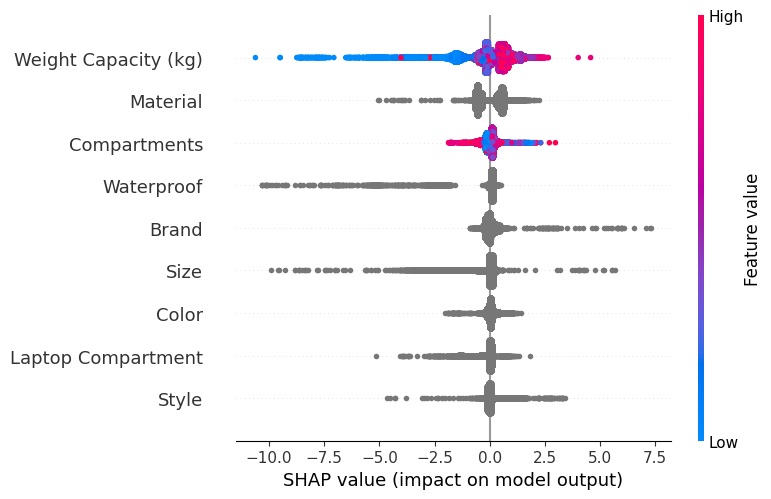

In [40]:
# SHAP 분석
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP 시각화
shap.summary_plot(shap_values, X_test)

# CatBoost 수행

In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모델
from catboost import CatBoostRegressor, Pool

# 데이터 분할 및 평가
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 특성 중요도
import shap

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# 데이터 로드
file_path = "/content/drive/My Drive/Colab Notebooks/backpack_prediction_challenge/playground-series-s5e2/train.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_csv(file_path)

In [44]:
# 수치형 결측치: 그대로 둬도 CatBoost가 처리하지만, 성능 개선을 위해 중앙값으로 처리
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 범주형 결측치: 'Missing'으로 대체
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna('Missing')

# 처리 후 확인
print(df.isnull().sum())

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64


In [45]:
df['Price'] = np.log1p(df['Price'])

In [46]:
# 학습/타깃 데이터 구성
X = df.drop(['Price','id'], axis=1, errors='ignore')
y = df['Price']

# 범주형 컬럼 리스트 추출
cat_features = list(X.select_dtypes(include='object').columns)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pool 객체 생성 (성능 최적화)
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

In [47]:
# CatBoost 회귀 모델 생성
model = CatBoostRegressor(
    iterations=1000,        # 최대 반복 횟수
    learning_rate=0.03,     # 학습률
    depth=6,                # 트리 깊이
    loss_function='RMSE',   # 회귀 문제이므로 RMSE 사용
    cat_features=cat_features,
    random_seed=42,
    verbose=100             # 학습 진행 상황 출력 주기
)

# 모델 학습
model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=100)

0:	learn: 0.5811545	test: 0.5793181	best: 0.5793181 (0)	total: 318ms	remaining: 5m 17s
100:	learn: 0.5805224	test: 0.5788409	best: 0.5788409 (100)	total: 29.3s	remaining: 4m 21s
200:	learn: 0.5803620	test: 0.5787996	best: 0.5787990 (189)	total: 1m 3s	remaining: 4m 14s
300:	learn: 0.5802230	test: 0.5787873	best: 0.5787873 (300)	total: 1m 51s	remaining: 4m 18s
400:	learn: 0.5801100	test: 0.5787803	best: 0.5787765 (367)	total: 2m 22s	remaining: 3m 32s
500:	learn: 0.5799135	test: 0.5787722	best: 0.5787706 (495)	total: 2m 53s	remaining: 2m 52s
600:	learn: 0.5797148	test: 0.5787547	best: 0.5787534 (593)	total: 3m 26s	remaining: 2m 17s
700:	learn: 0.5795360	test: 0.5787457	best: 0.5787447 (687)	total: 4m	remaining: 1m 42s
800:	learn: 0.5793830	test: 0.5787396	best: 0.5787393 (798)	total: 4m 31s	remaining: 1m 7s
900:	learn: 0.5792352	test: 0.5787306	best: 0.5787294 (894)	total: 5m 4s	remaining: 33.4s
999:	learn: 0.5790959	test: 0.5787240	best: 0.5787238 (980)	total: 5m 35s	remaining: 0us

best

In [48]:
# 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f"📊 MAE: {mae:.2f}")
print(f"📊 MSE: {mse:.2f}")
print(f"📊 RMSE: {rmse:.2f}")
print(f"🎯 R2 Score: {r2:.3f}")

📊 MAE: 0.48
📊 MSE: 0.33
📊 RMSE: 0.58
🎯 R2 Score: 0.002


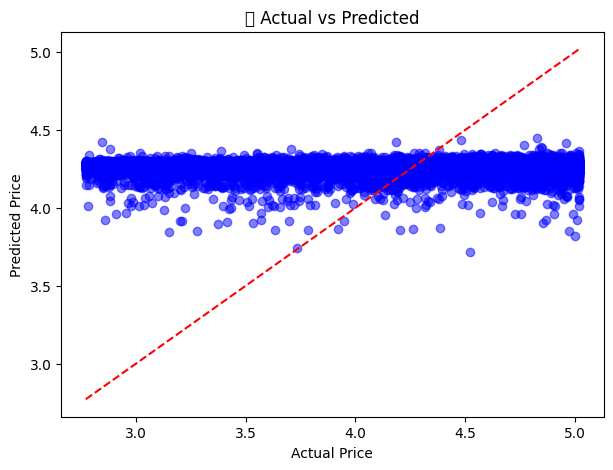

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('🔍 Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

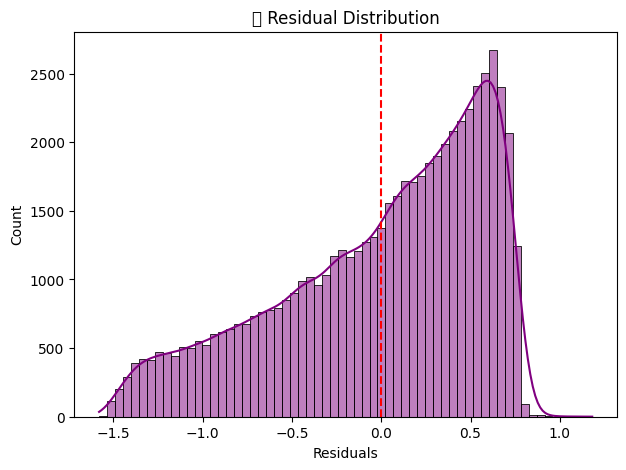

In [52]:
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title('🔍 Residual Distribution')
plt.xlabel('Residuals')
plt.axvline(0, color='red', linestyle='--')
plt.show()

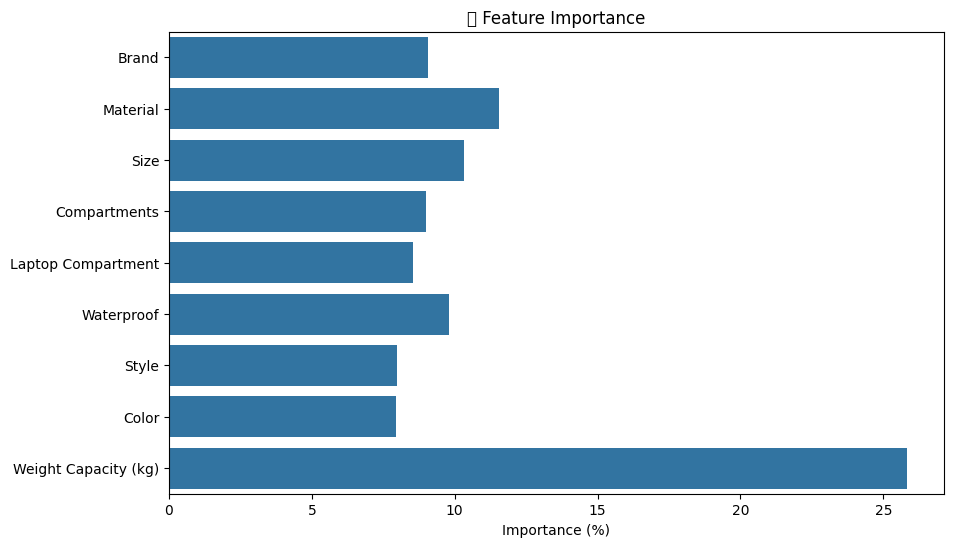

In [49]:
# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("🔍 Feature Importance")
sns.barplot(x=model.feature_importances_, y=model.feature_names_)
plt.xlabel("Importance (%)")
plt.show()

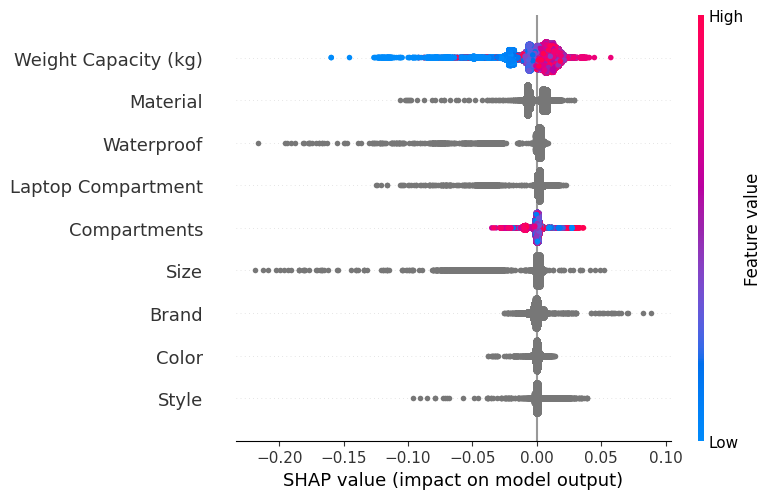

In [50]:
# SHAP 분석
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP 시각화
shap.summary_plot(shap_values, X_test)

# weight capacity 제외하기

In [53]:
df = pd.read_csv(file_path)

In [54]:
# 수치형 결측치: 그대로 둬도 CatBoost가 처리하지만, 성능 개선을 위해 중앙값으로 처리
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 범주형 결측치: 'Missing'으로 대체
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna('Missing')

# 처리 후 확인
print(df.isnull().sum())

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64


In [55]:
df['Price'] = np.log1p(df['Price'])

In [56]:
# 학습/타깃 데이터 구성
X = df.drop(['Price','id', 'Weight Capacity (kg)'], axis=1, errors='ignore')
y = df['Price']

# 범주형 컬럼 리스트 추출
cat_features = list(X.select_dtypes(include='object').columns)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pool 객체 생성 (성능 최적화)
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

In [57]:
# CatBoost 회귀 모델 생성
model = CatBoostRegressor(
    iterations=1000,        # 최대 반복 횟수
    learning_rate=0.03,     # 학습률
    depth=6,                # 트리 깊이
    loss_function='RMSE',   # 회귀 문제이므로 RMSE 사용
    cat_features=cat_features,
    random_seed=42,
    verbose=100             # 학습 진행 상황 출력 주기
)

# 모델 학습
model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=100)

0:	learn: 0.5811541	test: 0.5793164	best: 0.5793164 (0)	total: 760ms	remaining: 12m 38s
100:	learn: 0.5807526	test: 0.5790166	best: 0.5790164 (93)	total: 29s	remaining: 4m 17s
200:	learn: 0.5806354	test: 0.5789907	best: 0.5789907 (200)	total: 1m 7s	remaining: 4m 29s
300:	learn: 0.5805334	test: 0.5789793	best: 0.5789784 (281)	total: 1m 29s	remaining: 3m 26s
400:	learn: 0.5804439	test: 0.5789739	best: 0.5789739 (336)	total: 1m 52s	remaining: 2m 47s
500:	learn: 0.5803266	test: 0.5789646	best: 0.5789643 (498)	total: 2m 19s	remaining: 2m 18s
600:	learn: 0.5801929	test: 0.5789612	best: 0.5789597 (573)	total: 2m 47s	remaining: 1m 51s
700:	learn: 0.5800754	test: 0.5789568	best: 0.5789563 (699)	total: 3m 16s	remaining: 1m 23s
800:	learn: 0.5799541	test: 0.5789531	best: 0.5789529 (784)	total: 3m 45s	remaining: 56.1s
900:	learn: 0.5798432	test: 0.5789516	best: 0.5789515 (896)	total: 4m 15s	remaining: 28.1s
999:	learn: 0.5797228	test: 0.5789477	best: 0.5789477 (997)	total: 4m 43s	remaining: 0us

b

In [58]:
# 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f"📊 MAE: {mae:.2f}")
print(f"📊 MSE: {mse:.2f}")
print(f"📊 RMSE: {rmse:.2f}")
print(f"🎯 R2 Score: {r2:.3f}")

📊 MAE: 0.48
📊 MSE: 0.34
📊 RMSE: 0.58
🎯 R2 Score: 0.001


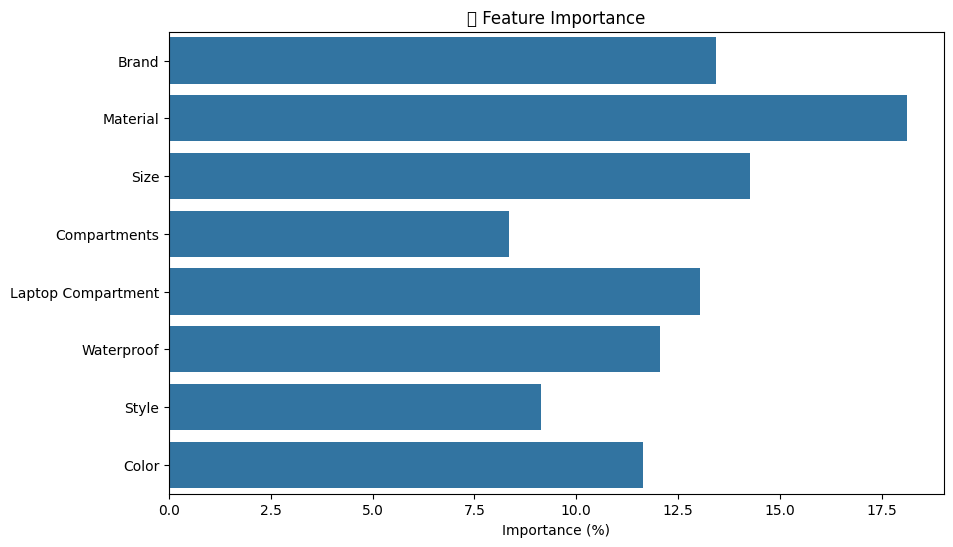

In [59]:
# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("🔍 Feature Importance")
sns.barplot(x=model.feature_importances_, y=model.feature_names_)
plt.xlabel("Importance (%)")
plt.show()

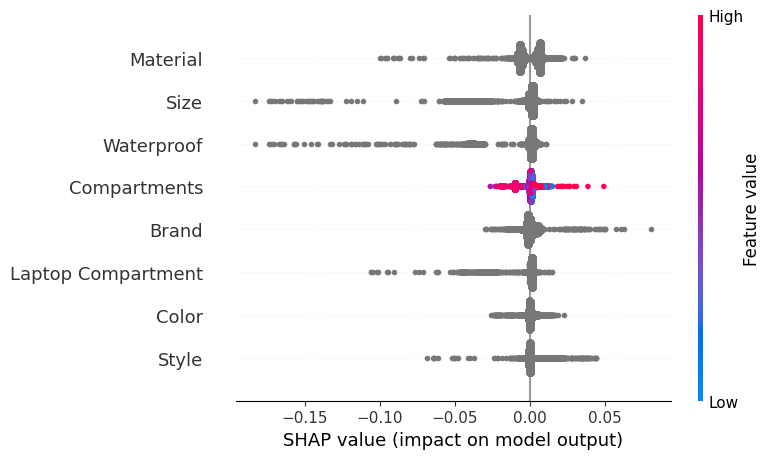

In [60]:
# SHAP 분석
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP 시각화
shap.summary_plot(shap_values, X_test)

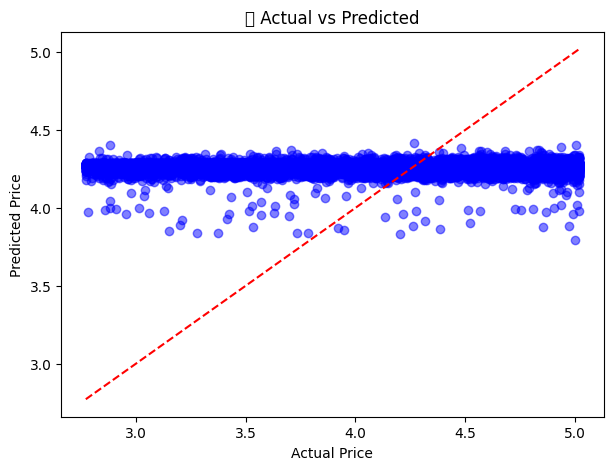

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('🔍 Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

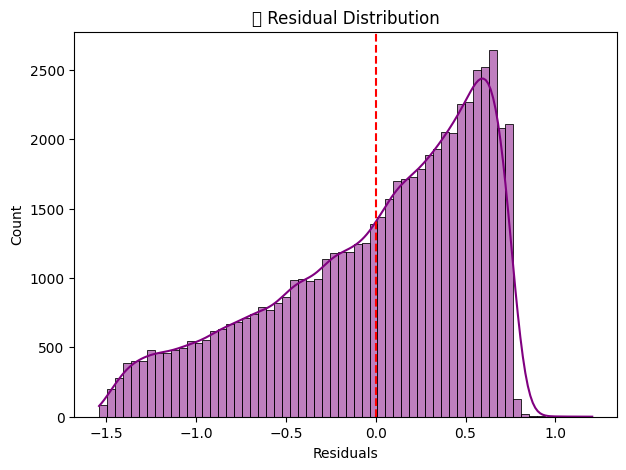

In [62]:
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title('🔍 Residual Distribution')
plt.xlabel('Residuals')
plt.axvline(0, color='red', linestyle='--')
plt.show()